## Setup

In [686]:
%matplotlib inline
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.compose import ColumnTransformer
import seaborn as sns

## Data

In [687]:
# lists the files in the folder
import os
print(os.listdir("data"))

['sample_submission.csv', 'test.csv', 'train.csv']


In [688]:
# Reads in the csv-files and creates a dataframe using pandas
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## Understanding the data

In [689]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY


In [690]:
test.head()

,Id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0,-122.27,37.87,35.0,3218.0,1108.0,1675.0,1000.0,1.7464,NEAR BAY
1,1,-118.94,34.18,24.0,3689.0,585.0,1898.0,581.0,5.9224,<1H OCEAN
2,2,-119.75,36.77,32.0,1962.0,399.0,1005.0,392.0,2.6726,INLAND
3,3,-118.34,33.93,32.0,1254.0,399.0,1281.0,386.0,2.2976,<1H OCEAN
4,4,-119.00,35.36,35.0,1021.0,280.0,1258.0,239.0,1.7375,INLAND


In [691]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [692]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  4128 non-null   int64  
 1   longitude           4128 non-null   float64
 2   latitude            4128 non-null   float64
 3   housing_median_age  4128 non-null   float64
 4   total_rooms         4128 non-null   float64
 5   total_bedrooms      4089 non-null   float64
 6   population          4128 non-null   float64
 7   households          4128 non-null   float64
 8   median_income       4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 322.6+ KB


In [693]:
train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.568763,35.630270,28.714571,2636.885841,537.999755,1425.131783,499.837936,3.871083,207262.390080
std,2.003747,2.137134,12.589203,2195.840228,422.944167,1126.453504,383.400473,1.909994,115838.329585
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1445.000000,295.000000,787.000000,279.000000,2.562500,120000.000000
50%,-118.490000,34.260000,29.000000,2122.500000,434.000000,1163.000000,409.000000,3.529450,180400.000000
75%,-118.010000,37.710000,37.000000,3137.000000,646.000000,1723.000000,603.000000,4.746450,265100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

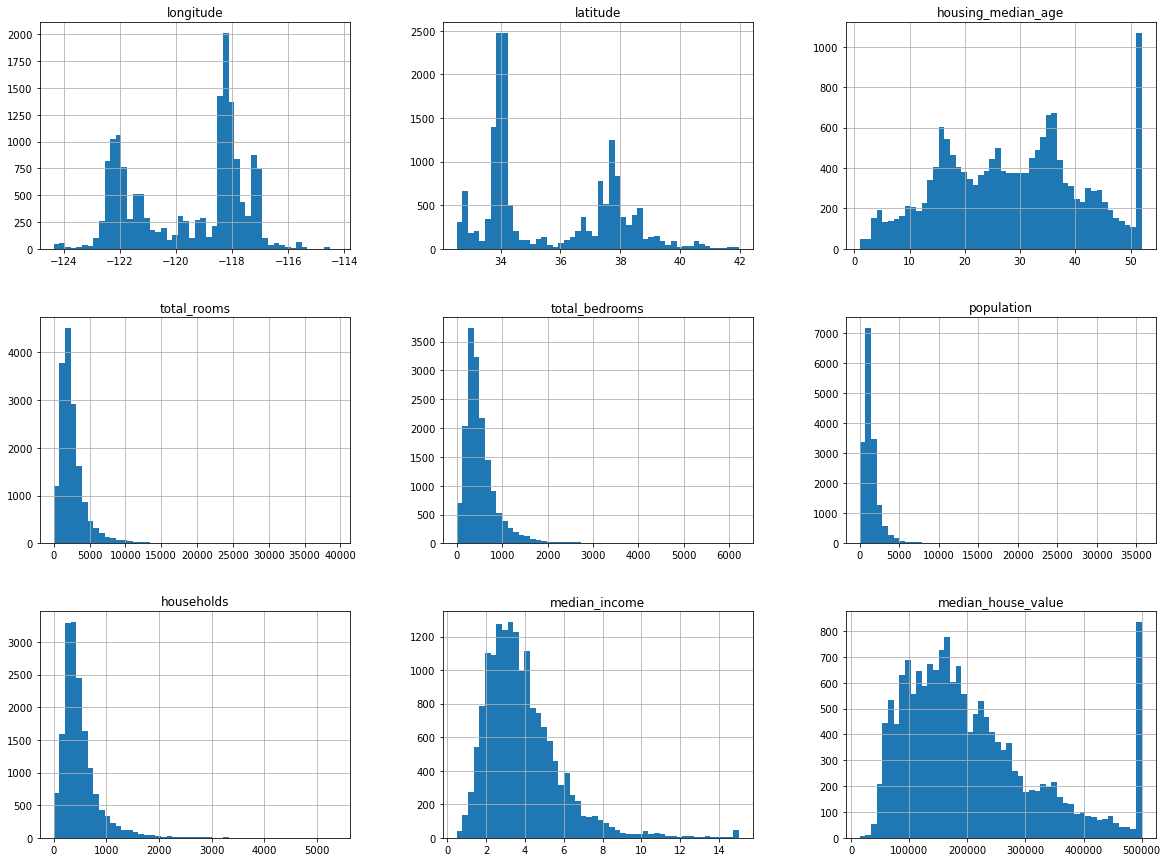

In [694]:
train.hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>]], dtype=object)

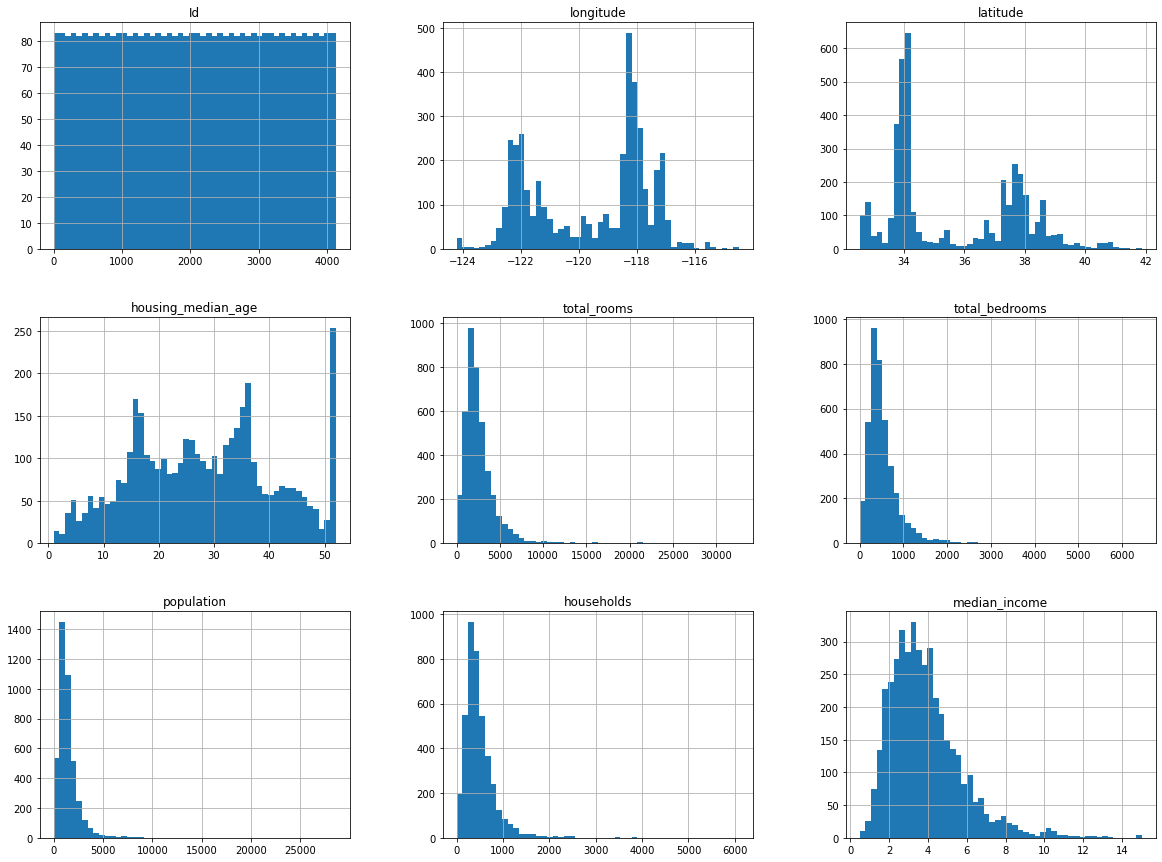

In [695]:
test.hist(bins=50, figsize=(20,15))

## Data preparation and machine learning

Prepare the data.

Create validation set to evaluate the models.

## Visualizing the data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

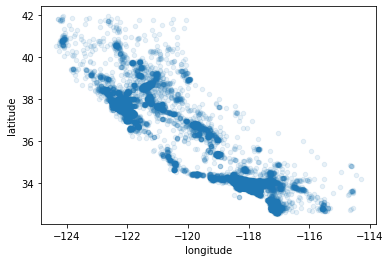

In [696]:
train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

We can clearly see where the high-density areas are.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

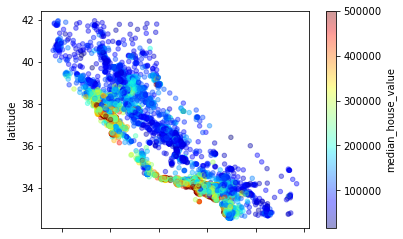

In [697]:
train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

This plot clearly shows us how house prices are related to their location.
We'll compute the standard correlation coefficient between every pair of attributes:

In [698]:
corr_matrix = train.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.684828
total_rooms           0.133566
housing_median_age    0.107684
households            0.065778
total_bedrooms        0.049941
population           -0.025008
longitude            -0.043824
latitude             -0.146748
Name: median_house_value, dtype: float64

We'll also check the correlation using scatter_matrix:

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

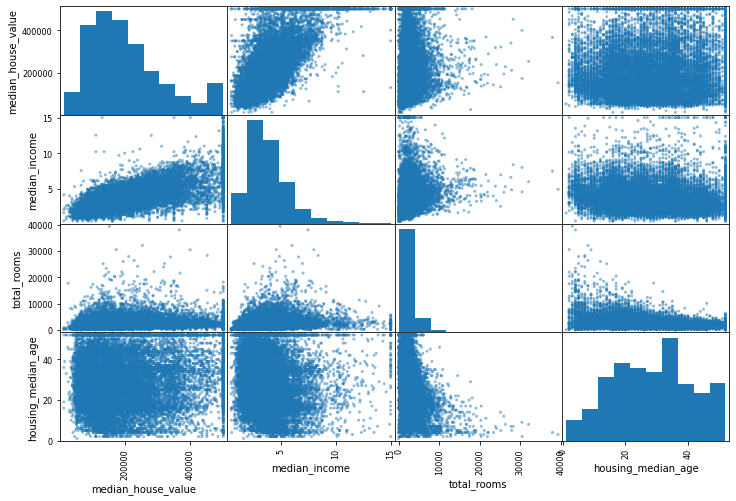

In [699]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(train[attributes], figsize=(12,8))

The most highly-correlated value to median house value seems to be median income.

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

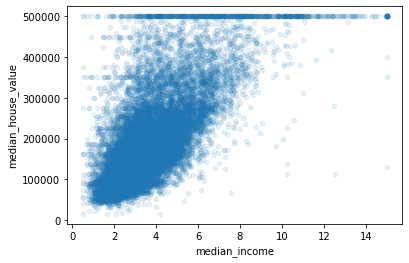

In [700]:
train.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [701]:
train["rooms_per_household"] = train["total_rooms"]/train["households"]
train["bedrooms_per_room"] = train["total_bedrooms"]/train["total_rooms"]
train["population_per_household"] = train ["population"] / train["households"]
train["area"] = train["longitude"]*train["latitude"]
train["long_plus_lat"] = train["longitude"] + train["latitude"]

test["rooms_per_household"] = test["total_rooms"]/test["households"]
test["bedrooms_per_room"] = test["total_bedrooms"]/test["total_rooms"]
test["population_per_household"] = test["population"] / test["households"]
test["area"] = test["longitude"]*test["latitude"]
test["long_plus_lat"] = test["longitude"] + test["latitude"]

print(train.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.13     37.67                40.0       1748.0           318.0   
1    -120.98     37.65                40.0        422.0            63.0   
2    -118.37     33.87                23.0       1829.0           331.0   
3    -117.89     33.90                23.0       1533.0           226.0   
4    -122.40     37.76                52.0       1529.0           385.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       914.0       317.0         3.8676            184000.0        NEAR BAY   
1       158.0        63.0         7.3841            172200.0          INLAND   
2       891.0       356.0         6.5755            359900.0       <1H OCEAN   
3       693.0       230.0         7.8980            258200.0       <1H OCEAN   
4      1347.0       348.0         2.9312            239100.0        NEAR BAY   

   rooms_per_household  bedrooms_per_room  population_per_household 

In [702]:
corr_matrix = train.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.684828
rooms_per_household         0.171947
total_rooms                 0.133566
housing_median_age          0.107684
area                        0.107080
households                  0.065778
total_bedrooms              0.049941
population                 -0.025008
population_per_household   -0.026596
longitude                  -0.043824
latitude                   -0.146748
bedrooms_per_room          -0.256396
long_plus_lat              -0.491330
Name: median_house_value, dtype: float64

In [703]:
train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,area,long_plus_lat
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000
mean,-119.568763,35.630270,28.714571,2636.885841,537.999755,1425.131783,499.837936,3.871083,207262.390080,5.413430,0.212969,3.067988,-4264.224492,-83.938493
std,2.003747,2.137134,12.589203,2195.840228,422.944167,1126.453504,383.400473,1.909994,115838.329585,2.271820,0.057613,10.905901,324.025098,0.817035
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.888889,0.100000,0.692308,-5207.673000,-85.890000
25%,-121.790000,33.930000,18.000000,1445.000000,295.000000,787.000000,279.000000,2.562500,120000.000000,4.444444,0.175318,2.431797,-4600.728000,-84.420000
50%,-118.490000,34.260000,29.000000,2122.500000,434.000000,1163.000000,409.000000,3.529450,180400.000000,5.230373,0.203218,2.821563,-4060.294250,-84.180000
75%,-118.010000,37.710000,37.000000,3137.000000,646.000000,1723.000000,603.000000,4.746450,265100.000000,6.055028,0.239708,3.283439,-4004.488875,-83.550000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333,-3753.968400,-78.290000


In [704]:
train["ocean_proximity"].value_counts()

<1H OCEAN     7346
INLAND        5214
NEAR OCEAN    2112
NEAR BAY      1835
ISLAND           5
Name: ocean_proximity, dtype: int64

## Prepare data

In [705]:
# Ensure notebook is reproducible
seed = 42
np.random.seed(seed)

We want to prepare our data, but first we have to revert to a clean training set. We seperate the predictors and the labels as we may want to apply different transformations to these values.

In [706]:
median = train["total_bedrooms"].median()
train["total_bedrooms"].fillna(median, inplace=True)
test["total_bedrooms"].fillna(median, inplace=True)

In [707]:
X = train.drop("median_house_value", axis=1)
X_num = X.drop("ocean_proximity", axis=1)
y = train["median_house_value"].copy()
y_test = test["Id"].copy()

print(type(X))

print(X.shape)
print(X_num.shape)

<class 'pandas.core.frame.DataFrame'>
(16512, 14)
(16512, 13)


Now we need to handle the categorical attribute ocean_proximity. We want to convert these text labels to numbers.

In [708]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X_cat = X[["ocean_proximity"]]
X_cat_encoded = encoder.fit_transform(X_cat)
X_cat_encoded

array([[3.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]])

In [709]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [710]:
imputer = SimpleImputer(strategy="median")

imputer.fit(X_num)

SimpleImputer(strategy='median')

In [711]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    X.columns.get_loc(c) for c in col_names]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
X_extra_attribs = attr_adder.transform(X.values)

In [712]:
X_extra_attribs = pd.DataFrame(
    X_extra_attribs,
    columns=list(X.columns)+["rooms_per_household", "population_per_household"],
    index=X.index)
X_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,area,long_plus_lat,rooms_per_household,population_per_household
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,NEAR BAY,5.514196,0.181922,2.883281,-4600.6371,-84.46,5.514196,2.883281
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,INLAND,6.698413,0.149289,2.507937,-4554.897,-83.33,6.698413,2.507937
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,<1H OCEAN,5.13764,0.180973,2.502809,-4009.1919,-84.5,5.13764,2.502809
3,-117.89,33.9,23.0,1533.0,226.0,693.0,230.0,7.898,<1H OCEAN,6.665217,0.147423,3.013043,-3996.471,-83.99,6.665217,3.013043
4,-122.4,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,NEAR BAY,4.393678,0.251799,3.87069,-4621.824,-84.64,4.393678,3.87069


## Build the pipeline for numerical attributes:

In [713]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

X_num_tr = num_pipeline.fit_transform(X_num)

In [714]:
X_num_tr

array([[-1.27826235,  0.95445204,  0.89646428, ...,  0.04435599,
        -0.01693693, -0.49175254],
       [-0.70432019,  0.94509343,  0.89646428, ...,  0.56563549,
        -0.05135459, -0.99646009],
       [ 0.59827896, -0.82368426, -0.45394013, ..., -0.12139949,
        -0.05182477, -0.5064297 ],
       ...,
       [ 0.93765346, -0.95938413, -1.88378009, ...,  0.61053242,
        -0.01267723, -0.96392659],
       [ 1.13229471, -0.71606022,  1.61138426, ..., -0.35129083,
         0.25474742, -0.46992773],
       [-1.0985935 ,  1.10418984, -1.96321564, ...,  1.0740272 ,
         0.02975272, -1.15998515]])

In [715]:
num_attribs = list(X_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OrdinalEncoder(), cat_attribs),
])

X_prepared = full_pipeline.fit_transform(X)

In [716]:
print(X_prepared)
print(X_prepared.shape)

[[-1.27826235  0.95445204  0.89646428 ... -0.01693693 -0.49175254
   3.        ]
 [-0.70432019  0.94509343  0.89646428 ... -0.05135459 -0.99646009
   1.        ]
 [ 0.59827896 -0.82368426 -0.45394013 ... -0.05182477 -0.5064297
   0.        ]
 ...
 [ 0.93765346 -0.95938413 -1.88378009 ... -0.01267723 -0.96392659
   0.        ]
 [ 1.13229471 -0.71606022  1.61138426 ...  0.25474742 -0.46992773
   1.        ]
 [-1.0985935   1.10418984 -1.96321564 ...  0.02975272 -1.15998515
   1.        ]]
(16512, 17)


In [717]:
'''
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
            self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
'''

'\nclass DataFrameSelector(BaseEstimator, TransformerMixin):\n    def __init__(self, attribute_names):\n            self.attribute_names = attribute_names\n    def fit(self, X, y=None):\n        return self\n    def transform(self, X):\n        return X[self.attribute_names].values\n'

In [718]:
'''
class CustomLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, sparse_output=False):
        self.sparse_output = sparse_output
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        enc = LabelBinarizer(sparse_output=self.sparse_output)
        return enc.fit_transform(X)  

cat_attribs = ["ocean_proximity"]
num_attribs = list(X_num)

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OrdinalEncoder())
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
    
])


X_prepared = full_pipeline.fit_transform(train)
print(X_prepared)
'''

'\nclass CustomLabelBinarizer(BaseEstimator, TransformerMixin):\n    def __init__(self, sparse_output=False):\n        self.sparse_output = sparse_output\n    def fit(self, X, y=None):\n        return self\n    def transform(self, X, y=None):\n        enc = LabelBinarizer(sparse_output=self.sparse_output)\n        return enc.fit_transform(X)  \n\ncat_attribs = ["ocean_proximity"]\nnum_attribs = list(X_num)\n\nnum_pipeline = Pipeline([\n    (\'selector\', DataFrameSelector(num_attribs)),\n    (\'imputer\', SimpleImputer(strategy="median")),\n    (\'attribs_adder\', CombinedAttributesAdder()),\n    (\'std_scaler\', StandardScaler())\n])\n\ncat_pipeline = Pipeline([\n    (\'selector\', DataFrameSelector(cat_attribs)),\n    (\'cat_encoder\', OrdinalEncoder())\n])\n\nfull_pipeline = FeatureUnion(transformer_list=[\n    ("num_pipeline", num_pipeline),\n    ("cat_pipeline", cat_pipeline),\n    \n])\n\n\nX_prepared = full_pipeline.fit_transform(train)\nprint(X_prepared)\n'

Testing different models

In [719]:
# Prepare test data
y_num = test.drop("Id", axis=1)
y_prepared = full_pipeline.transform(y_num)
#y_prepared = np.append(y_prepared, np.zeros((4128, 1)), axis=1)

In [720]:
# Perform linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_prepared, y)

y_pred_lin = lin_reg.predict(y_prepared)

print("Mean square error: %f" % mean_squared_error(y_test, y_pred_lin))
print(sqrt(mean_squared_error(y_test, y_pred_lin)))
print("Coefficient of determination: %f" % r2_score(y_test, y_pred_lin))

Mean square error: 50148635013.584480
223938.9091104636
Coefficient of determination: -35314.146389


In [721]:
# Perform Decision Tree Regression
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_prepared, y)

y_pred_dtr = dt_reg.predict(y_prepared)

print("Mean square error: %f" % mean_squared_error(y_test, y_pred_dtr))
print(sqrt(mean_squared_error(y_test, y_pred_dtr)))
print("Coefficient of determination: %f" % r2_score(y_test, y_pred_dtr))

Mean square error: 55470841423.267197
235522.4860247259
Coefficient of determination: -39062.094831


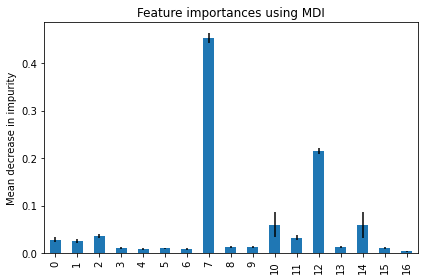

In [722]:
X_df = pd.DataFrame(X_prepared)

feature_names = [f'{col}' for col in X_df.columns]

rf_reg = RandomForestRegressor(random_state=seed)
rf_reg.fit(X_prepared, y)

importances = rf_reg.feature_importances_

std = np.std([
    tree.feature_importances_ for tree in rf_reg.estimators_
], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#print("Mean square error: %f" % mean_squared_error(y_test, y_pred_rf))
#print("Root mean square error: %f" % np.sqrt(mean_squared_error(y_test, y_pred_rf)))
#print("Coefficient of determination: %f" % r2_score(y_test, y_pred_rf))

In [723]:
y_pred_rf = rf_reg.predict(y_prepared)

mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

print("Mean square error: ", mse)
print("Root mean square error: ", rmse)

Mean square error:  53136357380.05625
Root mean square error:  230513.24773222092


We compute a 95% confidence interval for the test RMSE:

## Cross Validation

In [749]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_reg, X_prepared, y, cv=10, scoring="neg_mean_squared_error")

rf_reg_scores = np.sqrt(-scores)

In [752]:

print("scores: ", scores)
print("mean: ", scores.mean())
print("scores: ", scores.std())

print(np.sqrt(-scores.mean()))


scores:  [-2.37392586e+09 -2.02679371e+09 -2.27789295e+09 -2.32740212e+09
 -2.42111692e+09 -2.32540103e+09 -2.23134253e+09 -2.12900947e+09
 -2.66803213e+09 -2.19592184e+09]
mean:  -2297683855.901719
scores:  166384706.396975
47934.16167934638


## Fine Tuning Model

In [726]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

rf_reg = RandomForestRegressor()

grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(X_prepared, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [732]:
# Get best combination of hyperparameters
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [733]:
# Get best esimator
final_prediction = grid_search.best_estimator_.predict(y_prepared)

final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

print("Mean square error: ", final_mse)
print("Root mean square error: ", final_rmse)

Mean square error:  52346489385.39738
Root mean square error:  228793.55188771684


## Submission

In [734]:
median_house_value = [0 for i in test['Id']] 

In [735]:
len(median_house_value)

4128

In [736]:
median_house_value[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [737]:
submission = pd.DataFrame({'Id': test['Id'], 'median_house_value': final_prediction})

In [738]:
submission.head()

,Id,median_house_value
0,0,239083.366667
1,1,259300.000000
2,2,72643.333333
3,3,159903.333333
4,4,49033.333333


In [739]:
submission.to_csv('submission.csv', index=False)

In [48]:
old_sub = pd.read_csv("submission_45691.csv")
new_sub = pd.read_csv("submission.csv")

old_sub.compare(new_sub)

median_house_value               
                   self          other
0         254991.804340  239083.366667
1         302402.498872  259300.000000
2         107792.472246   72643.333333
3         181622.942013  159903.333333
4          84111.427290   49033.333333
...                 ...            ...
4123      156172.348891  160990.000000
4124      417740.017275  424203.600000
4125      120865.299245   90180.000000
4126      330638.309515  363370.100000
4127      174164.957752  175420.000000

[4128 rows x 2 columns]

In [49]:
difference = [x[0] - x[1] for x in zip(old_sub.median_house_value, new_sub.median_house_value)]

print(np.average(difference))

9050.504197474298
